In [1]:
import pandas as pd
from exosyspop.populations import TRILEGAL_BGBinaryPopulation

targets = pd.read_hdf('targets.h5')
bgstars = pd.read_hdf('bgstars.h5')
pop = TRILEGAL_BGBinaryPopulation(targets, bgstars)

dmag regressor trained, R2=0.981527899446
qR regressor trained, R2=0.985268049125


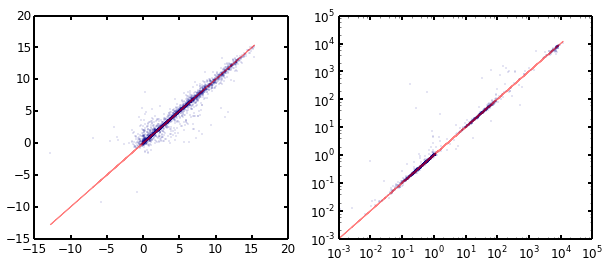

In [2]:
%matplotlib inline
pop._train_pipelines(n_jobs=8, plot=True)

In [5]:
pop._define_stars()

In [6]:
len(pop.stars)

34104

In [9]:
%prun pop._generate_binaries()